<a target="_blank" href="https://colab.research.google.com/github/JLDC/Data-Science-Fundamentals/blob/master/notebooks/207_neural-networks-in-sklearn.ipynb">
    <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Open this notebook in Google Colab
</a>

___

# Neural Networks with `scikit-learn`
___

In the previous notebook, we have seen how to write out the equations for forward passes and backpropagation to build our own neural network using only NumPy.

While this is a nice didactical example, in practice, you would never code your own neural network from scratch. This would be terribly inefficient. A lot of very smart people have spent a long time figuring out how to write code to make neural network training extremely efficient, it would be a mistake to not re-use their work.

In this notebook, we will very briefly show you how to use `scikit-learn` to set up a neural network for either classification or regression. **We recommend using `scikit-learn` for your project**, as this follows the same syntax of the other estimators you have seen until now. However, as your Python knowledge grows, you will realize that for neural networks, `scikit-learn` is not used. Instead, you will encounter either [PyTorch](https://pytorch.org/), [TensorFlow](https://www.tensorflow.org/), or [JAX](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html). Those are the three dominant libraries in Python when it comes to deep learning. Unfortunately, they are a bit more complicated and require knowledge of a few somewhat advanced concepts that we have not taught you in this course. For your project, working with a known framework such as `scikit-learn` is more than enough.

Lastly, note that we have not taught you `scikit-learn` because it is easy. It is, without doubt, the dominant package in Python when it comes to machine learning. The three above mentioned packages are simply particularly specialized for deep learning (i.e., neural networks with many layers), they do not offer any other type of machine learning techniques such as decision trees, random forests or clustering algorithms that `scikit-learn` implements.

In [24]:
# Import our standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the multilayer perceptron regressor and classifier from sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
# Import a helper to scale our data
from sklearn.preprocessing import StandardScaler

# Define the path where the data is stored
DATA_PATH = "https://raw.githubusercontent.com/JLDC/Data-Science-Fundamentals/master/data"

## Classification
___

In this short example, we show how to build a neural network to classify multiple categories (virginica, setosa, and versicolors iris flowers).

In [25]:
# Use the iris dataset
df = pd.read_csv(f"{DATA_PATH}/iris.csv")

In [26]:
# Initialize a classifier which we will use to classify the species
# Use three hidden layers, with sizes 32, 64, and 32, ReLU activation functions,
# stochastic gradient descent optimization and a regularization paramater
# (lambda or alpha) of 0.001, batchsizes of 32 and 1000 epochs
nnet = MLPClassifier(hidden_layer_sizes=(32, 64, 32), activation="relu", solver="sgd",
                    alpha=0.001, batch_size=32, max_iter=1000)

In [27]:
# Features of our dataset
X = df[df.columns[:-1]]
# Output to predict
y = df["species"]

# Scale the inputs
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
# Fit the network
nnet.fit(X, y)

# Make predictions
ypred = nnet.predict(X)

# Count the number of missclassifications
missclassifications = ypred != y

print(f"The network missclassifies {missclassifications.sum()} flowers")

The network missclassifies 2 flowers


## Regression
___

In this short example, we show how to build a neural network to predict a continuous variable such as the crop yields.

In [29]:
# Use the US crops dataset
df = pd.read_csv(f"{DATA_PATH}/us_crops.csv")

In [30]:
# Initialize a neural network to predict the crop yields given the temperature
# Use three hidden layers, with sizes 32, 64, and 32, ReLU activation functions,
# stochastic gradient descent optimization and a regularization paramater
# (lambda or alpha) of 0.001, batchsizes of 32 and 1000 epochs
#nnet = MLPRegressor(hidden_layer_sizes=(32, 64, 32), activation="relu", solver="sgd",
#                    alpha=0.001, batch_size=32, max_iter=1000)


In [31]:
# Features of our dataset
X = df[["temp"]]
# Output to predict
y = df["yield"]

# Scale the inputs
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Scale the outputs (we cannot use StandardScaler() on a 1D array)
mu, sigma = y.mean(), y.std() # We will use this to scale back to original values!
y = (y - mu) / sigma

In [39]:
from sklearn.model_selection import GridSearchCV

nnet = MLPClassifier(random_state=42)

mlp_param_grid = {
    'hidden_layer_sizes': [(8,8), (16, 16), (64, 64)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'max_iter': [1000]
}

grid_search = GridSearchCV(estimator=nnet, param_grid=mlp_param_grid, cv=3, n_jobs=-1)
grid_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_


ValueError: 
All the 162 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 849, in fit
    return self._fit(X, y, sample_weight=sample_weight, incremental=False)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 473, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1241, in _validate_input
    self._label_binarizer.fit(y)
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\preprocessing\_label.py", line 312, in fit
    self.classes_ = unique_labels(y)
                    ~~~~~~~~~~~~~^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\utils\multiclass.py", line 105, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([-0.18117208, -0.32345292,  0.12582397, -0.81371114, -0.02629722,
        0.40654337,  0.81644109, -1.74189498, -0.365598  ,  0.20246278,
       -0.45821244,  2.1948015 , -2.16922131, -0.20854177,  1.4490068 ,
       -0.36096036, -0.17771645, -0.68332093, -0.05103713, -0.09404791,
        0.50672227,  0.51407455, -0.34746058, -0.55415257,  0.51037664,
       -0.33083387,  0.98679316, -1.87073915, -1.25214594,  1.34109288,
        0.52486273, -0.69195457, -1.09988369,  1.31307799,  0.31143906,
        0.00912688,  1.8162267 ,  0.55634289,  2.0831145 ,  0.23077609,
        0.66612561,  0.2044311 ,  0.7062047 ,  0.80489881,  0.31175185,
        2.03813462,  0.51355884,  1.24197279, -1.30826114, -0.52015975,
       -0.22387538, -1.9088821 , -1.94952186,  0.99889129, -1.35497174,
        2.23084627, -1.3912128 ,  1.06627475, -2.18498246, -1.11960228,
       -0.03551895, -0.31721167, -0.84121104,  0.27696664,  0.09178323,
        0.32966543]),)

--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 849, in fit
    return self._fit(X, y, sample_weight=sample_weight, incremental=False)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 473, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1241, in _validate_input
    self._label_binarizer.fit(y)
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\preprocessing\_label.py", line 312, in fit
    self.classes_ = unique_labels(y)
                    ~~~~~~~~~~~~~^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\utils\multiclass.py", line 105, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([-0.71782887,  0.35183475,  0.56204599,  0.32476775, -0.42913793,
       -0.59710391,  0.05104021, -0.03374767,  0.48381663,  1.54986461,
        1.14673936, -1.0325141 ,  0.14571989,  0.04826341,  1.6944287 ,
        0.09967199, -0.0229574 ,  0.87592904,  0.64340219, -1.36945092,
       -0.68495005, -1.57581456, -1.5366331 , -0.1634594 , -1.00302655,
       -1.06639189, -0.05528728, -0.1228603 ,  1.56155781,  0.67249112,
       -1.24585688,  0.86512771,  0.47444738, -0.31697336,  1.31307799,
        0.31143906,  0.00912688,  1.8162267 ,  0.55634289,  2.0831145 ,
        0.23077609,  0.66612561,  0.2044311 ,  0.7062047 ,  0.80489881,
        0.31175185,  2.03813462,  0.51355884,  1.24197279, -1.30826114,
       -0.52015975, -0.22387538, -1.9088821 , -1.94952186,  0.99889129,
       -1.35497174,  2.23084627, -1.3912128 ,  1.06627475, -2.18498246,
       -1.11960228, -0.03551895, -0.31721167, -0.84121104,  0.27696664,
        0.09178323,  0.32966543]),)

--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 849, in fit
    return self._fit(X, y, sample_weight=sample_weight, incremental=False)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 473, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1241, in _validate_input
    self._label_binarizer.fit(y)
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\preprocessing\_label.py", line 312, in fit
    self.classes_ = unique_labels(y)
                    ~~~~~~~~~~~~~^^^
  File "c:\Users\polpu\Desktop\GitHub Repositories\neuronal-computation-labs\venv\Lib\site-packages\sklearn\utils\multiclass.py", line 105, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([-0.71782887,  0.35183475,  0.56204599,  0.32476775, -0.42913793,
       -0.59710391,  0.05104021, -0.03374767,  0.48381663,  1.54986461,
        1.14673936, -1.0325141 ,  0.14571989,  0.04826341,  1.6944287 ,
        0.09967199, -0.0229574 ,  0.87592904,  0.64340219, -1.36945092,
       -0.68495005, -1.57581456, -1.5366331 , -0.1634594 , -1.00302655,
       -1.06639189, -0.05528728, -0.1228603 ,  1.56155781,  0.67249112,
       -1.24585688,  0.86512771,  0.47444738, -0.31697336, -0.18117208,
       -0.32345292,  0.12582397, -0.81371114, -0.02629722,  0.40654337,
        0.81644109, -1.74189498, -0.365598  ,  0.20246278, -0.45821244,
        2.1948015 , -2.16922131, -0.20854177,  1.4490068 , -0.36096036,
       -0.17771645, -0.68332093, -0.05103713, -0.09404791,  0.50672227,
        0.51407455, -0.34746058, -0.55415257,  0.51037664, -0.33083387,
        0.98679316, -1.87073915, -1.25214594,  1.34109288,  0.52486273,
       -0.69195457, -1.09988369]),)


In [ ]:
# Fit the network
#nnet.fit(X, y)

# Make predictions
#ypred = nnet.predict(X)
ypred = best_model.predict(X)

# Reconstruct outputs and scale predictions
y = y * sigma + mu
ypred = ypred * sigma + mu

# Compute the MAE
mae = np.sum(np.abs(ypred - y))

print(f"The mean absolute error is {mae}")

The mean absolute error is 15194.515075847421


In [ ]:
# Create a prediction on the min to the max temp (for plotting)
xmin, xmax = X.min(), X.max()
xs = np.linspace(X.min(), X.max(), 100)
# Predict and scale back to original range for the plot
ys = nnet.predict(xs.reshape(-1, 1)) * sigma + mu

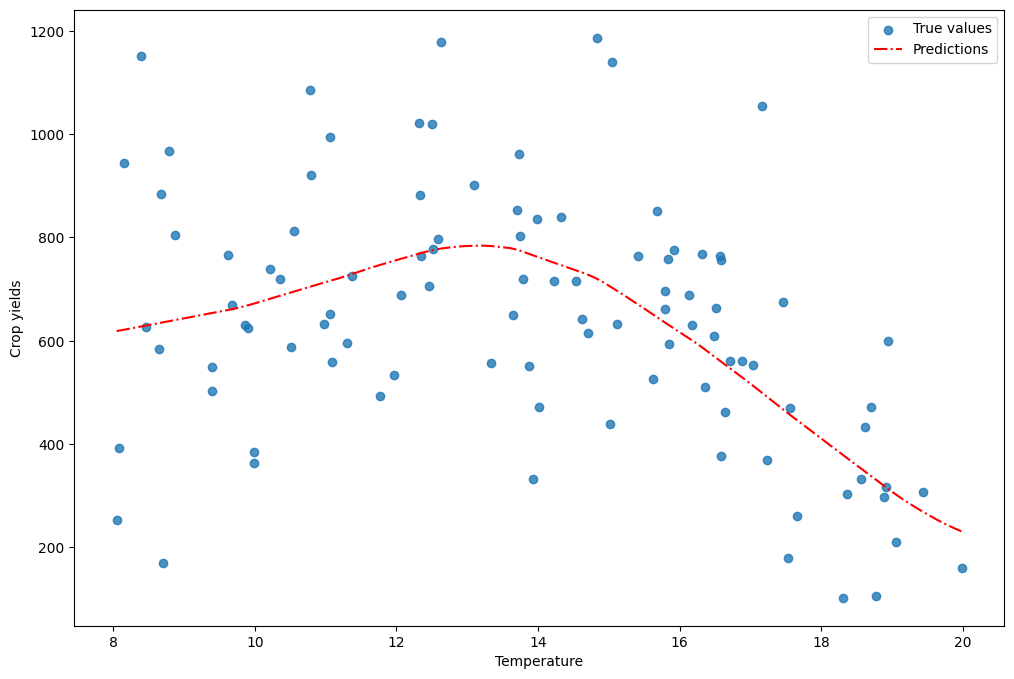

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the true values
ax.scatter(df["temp"], df["yield"], label="True values", alpha=0.8)
# Plot the predictions
ax.plot(
    scaler.inverse_transform(xs.reshape(-1, 1)),
    ys, color="red", linestyle="dashdot", label="Predictions"
)

# Add labels and legend
ax.set_xlabel("Temperature")
ax.set_ylabel("Crop yields")
ax.legend()

⚠️ As a last warning, neural networks are not the *End All Be All* of machine learning models. They come with many hyperparameters and choosing the right ones is a daunting task. As you might find out, a change of hyperparameters can lead to drastic changes in the model (good or bad). If your network is very unstable, a good performance might simply mean that you have a lucky seed on your validation set, be wary!

In this notebook, we have chosen some hyperparameters that might be good or bad, don't just use the ones from those examples but try to find the best ones for your problem instead (*Hint*: Think about some methods we have seen to figure out which model is best!). Furthermore, scaling is incredibly important, if you try running the regression problem without scaling the output, you will see that the network is doing much worse than even the simplest estimator we covered in class.

#### <font style="color:green">**➡️ ✏️ Question 1**</font>

Using the code above as an inspiration, create either a classifier or a regressor neural network for a data set of your choice (you can pick one from the data folder). Try fitting multiple features, play around with different hyperparameters and discuss how the results compare.

In [ ]:
from sklearn.model_selection import GridSearchCV

nnet = MLPClassifier(random_state = 42)

mlp_param_grid = {
    'hidden_layer_sizes': [(8,8), (16, 16), (64, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01, 0.1 ],
    'batch_size': [16, 32, 64],
    'max_iter': [1000]
}

grid_search = GridSearchCV(mlp_param_grid, score='f1', cv=3, n_jobs=-1)

grid_search.fit(X, y)
